# 선형대수 기초
- 역행렬 기반 w,b, 추정

In [1]:
import numpy as np

In [2]:
# x = [1,2,3]
# y = [2.2, 4.4, 6.4]  
# y = wx +  b

X = np.array([[1, 1], 
              [2, 1], 
              [3, 1]])      #  3 x 2 행렬

y = np.array([[2.2], 
              [4.4], 
              [6.4]])       # 3 x 1 행렬

# 학습을 통해 w, b를 추정
W = np.matmul(np.linalg.pinv(X), y)   # 계산을 위해 X의 역행렬 구해서 2 x 3 행렬로 만듦

print(W)                # w : 2.1, b : 0.13


[[2.1       ]
 [0.13333333]]


In [3]:
# 예측   y = wx + b 
p = np.matmul(X, W)
print(p)

[[2.23333333]
 [4.33333333]
 [6.43333333]]


In [4]:
W_1 = np.array([[2.1], [0.13]])
W_2 = np.array([[1], [0.1]])
p1 = np.matmul(X, W_1)   
p2 = np.matmul(X, W_2)
print('정답 :')
print(y)
print('예측1 :'),
print(p1)              # 3x1
print('예측2 :')
print(p2)

정답 :
[[2.2]
 [4.4]
 [6.4]]
예측1 :
[[2.23]
 [4.33]
 [6.43]]
예측2 :
[[1.1]
 [2.1]
 [3.1]]


# 오차계산 (MSE : Mean Squared Error)

In [5]:
p = np.matmul(X, W_1)
print('MSE : ', np.mean((y - p) ** 2))

p = np.matmul(X, W_2)
print('MSE : ', np.mean((y - p) ** 2))

MSE :  0.0022333333333333476
MSE :  5.796666666666668


# 시각화
- 그래프 출력 

(3,)
(3,)


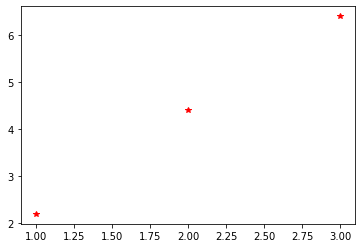

In [6]:
import matplotlib.pyplot as plt

x_ = X[:, 0]
y_ = y[:, 0]   # y.flatten()

print(x_.shape)
print(y_.shape)

plt.plot(x_, y_, '*r')

In [7]:
test = np.linspace(-1, 7, 50)   # 벡터 50개  50 x 1 행렬      # W : 2 x 1 행렬
print(test.shape)

# p = np.matmul(test, W)     # 계산이 되지 않음 (행렬이 맞지 않기 때문에)
test = np.ones((50, 2))
test[: , 0] = np.linspace(-1, 7, 50)
print(test.shape)        # 50 x 2 행렬 완성

p = np.matmul(test, W_1)     # 계산이 가능해짐
print(p.shape)
print(p) # 계산됨

p2 = np.matmul(test, W_2)     # 계산이 가능해짐

(50,)
(50, 2)
(50, 1)
[[-1.97      ]
 [-1.62714286]
 [-1.28428571]
 [-0.94142857]
 [-0.59857143]
 [-0.25571429]
 [ 0.08714286]
 [ 0.43      ]
 [ 0.77285714]
 [ 1.11571429]
 [ 1.45857143]
 [ 1.80142857]
 [ 2.14428571]
 [ 2.48714286]
 [ 2.83      ]
 [ 3.17285714]
 [ 3.51571429]
 [ 3.85857143]
 [ 4.20142857]
 [ 4.54428571]
 [ 4.88714286]
 [ 5.23      ]
 [ 5.57285714]
 [ 5.91571429]
 [ 6.25857143]
 [ 6.60142857]
 [ 6.94428571]
 [ 7.28714286]
 [ 7.63      ]
 [ 7.97285714]
 [ 8.31571429]
 [ 8.65857143]
 [ 9.00142857]
 [ 9.34428571]
 [ 9.68714286]
 [10.03      ]
 [10.37285714]
 [10.71571429]
 [11.05857143]
 [11.40142857]
 [11.74428571]
 [12.08714286]
 [12.43      ]
 [12.77285714]
 [13.11571429]
 [13.45857143]
 [13.80142857]
 [14.14428571]
 [14.48714286]
 [14.83      ]]


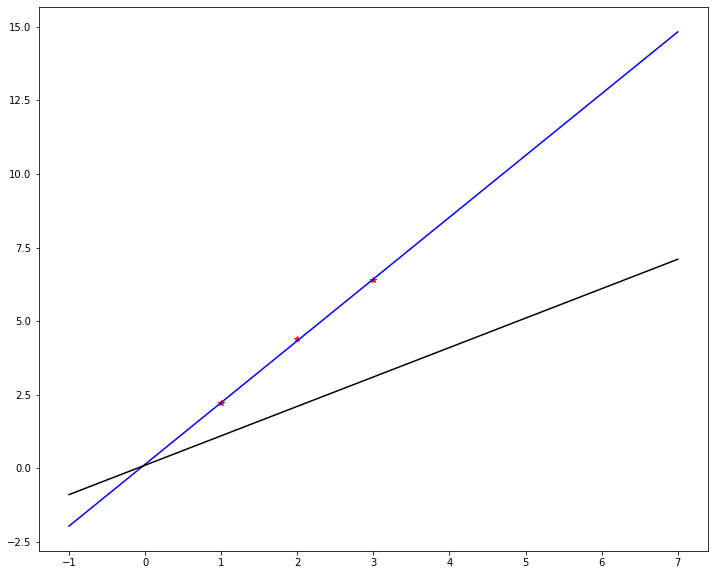

In [8]:
# W_1과 W_2의 예측선 시각화

plt.figure(figsize = (12, 10))
plt.plot(x_, y_, '*r')
plt.plot(test[:, 0], p[:, 0], 'b')
plt.plot(test[:, 0], p2[:, 0], 'k')
plt.show()

# 다차원 평면 예측

- 실업률과 이자율에 따른 주가 예측

- 주가 = w1 * 실업률 + w2 * 이자율 + b

In [9]:
Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

X = np.ones((Interest_Rate.size, 3))
X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
y = Stock_Index_Price.reshape(-1, 1)

W = np.matmul(np.linalg.pinv(X), y)
print(W) # w1, w2, b

p = np.matmul(X, W)

cost = np.mean((y - p) ** 2)

print(cost)
print(y)
print(p)

[[-250.14657137]
 [ 345.54008701]
 [1798.40397763]]
4356.611357123127
[[1464]
 [1394]
 [1357]
 [1293]
 [1256]
 [1254]
 [1234]
 [1195]
 [1159]
 [1167]
 [1130]
 [1075]
 [1047]
 [ 965]
 [ 943]
 [ 958]
 [ 971]
 [ 949]
 [ 884]
 [ 866]
 [ 876]
 [ 822]
 [ 704]
 [ 719]]
[[1422.86238865]
 [1336.47736689]
 [1336.47736689]
 [1336.47736689]
 [1311.46270976]
 [1261.43339548]
 [1286.44805262]
 [1200.06303087]
 [1200.06303087]
 [1175.04837373]
 [1063.64869484]
 [1013.61938057]
 [ 988.60472343]
 [ 927.23435881]
 [ 952.24901595]
 [ 877.20504454]
 [ 852.1903874 ]
 [ 877.20504454]
 [ 877.20504454]
 [ 877.20504454]
 [ 927.23435881]
 [ 852.1903874 ]
 [ 852.1903874 ]
 [ 877.20504454]]


# 3차원 그래프

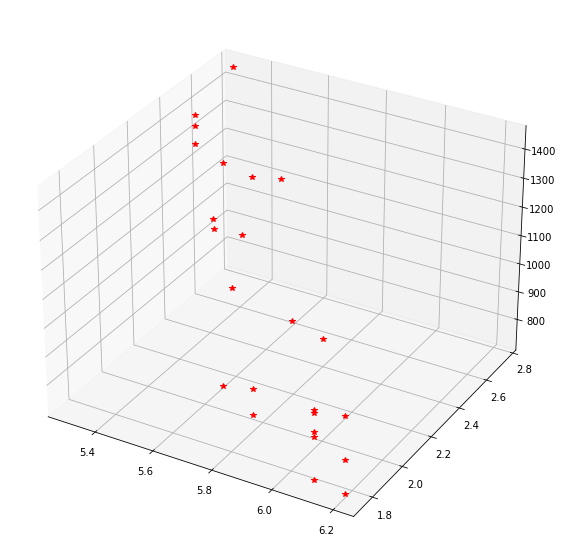

In [10]:
# 별도의 창을 띄움
# %matplotlib qt5

%matplotlib inline

fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection = '3d')

ax.plot(X[:, 0],         # 실업률 (x 축)
        X[:, 1],         # 이자율 (y 축)
        y[:, 0],         # 주가   (z 축)
       '*r')
plt.show()

In [11]:
xx, yy = np.mgrid[-1 : 2 : 1, 10 : 13 : 1]

print(xx)
print(yy)
print()

xx = xx.flatten()
yy = yy.flatten()

print(xx)
print(yy)
print()

data = np.c_[xx, yy]
print(data)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
[[10 11 12]
 [10 11 12]
 [10 11 12]]

[-1 -1 -1  0  0  0  1  1  1]
[10 11 12 10 11 12 10 11 12]

[[-1 10]
 [-1 11]
 [-1 12]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 1 10]
 [ 1 11]
 [ 1 12]]


In [12]:
xx, yy = np.mgrid[-1 : 2 : 0.1, 10 : 13 : 0.1]
data = np.c_[xx.flatten(), yy.flatten()]
print(data.shape)

(900, 2)


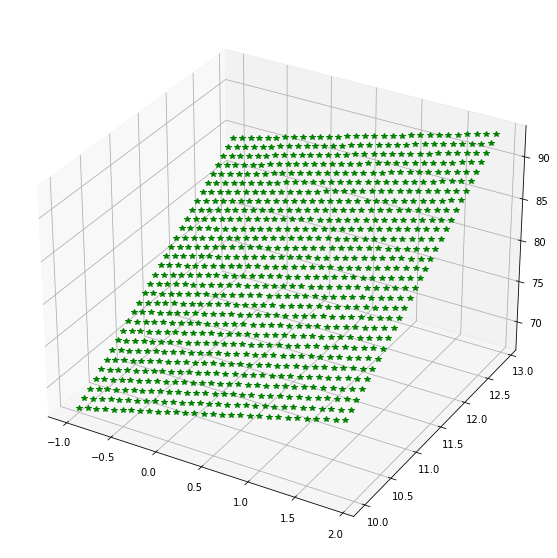

In [13]:
z = 3* data[:,0] +6*data[:, 1] +10

fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection='3d')
ax.plot(data[:,0],  data[:,1], z, 'g*' ) 

In [14]:
xx, yy = np.mgrid[5:7:0.05,  1:3:0.05]
data = np.c_[xx.flatten(), yy.flatten()]
print(data.shape)

(1600, 2)


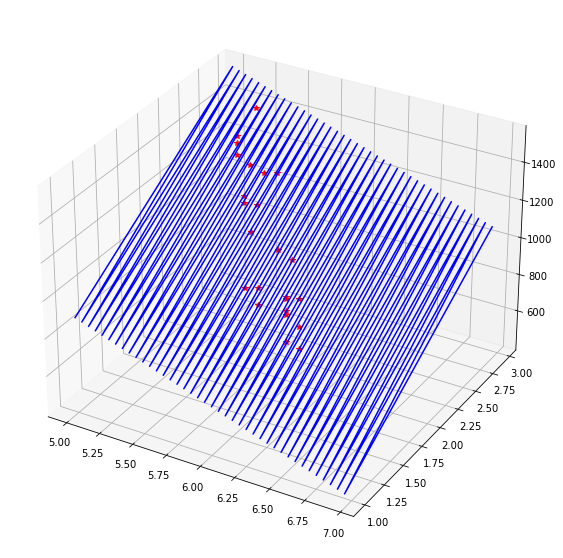

In [15]:
n = Interest_Rate.size
X = np.ones((n, 3))
X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
y = Stock_Index_Price.reshape(-1, 1)

W = np.matmul(np.linalg.pinv(X), y)   

xx, yy = np.mgrid[5: 7: 0.05, 1: 3: 0.05] 
test = np.c_[xx.flatten(), yy.flatten(), np.ones( xx.size )]
p = np.matmul(test, W)

fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection='3d')
ax.plot(X[:, 0], X[:, 1], y[:, 0], 'r*')
ax.plot(test[:, 0], test[:, 1], p[:, 0], 'b')
plt.show()

# 경사하강법

[ 2.8 11.2 25.8]
2.157142857142921 0.004761904761904791


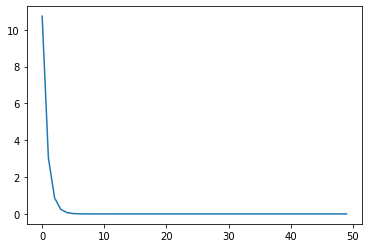

In [23]:
#예측,   y = wx+b  = xw +  b  , forward


x = np.array([1,2,3])
y = np.array([2.2, 4.4, 6.4])
# y = wx
# cost =  (wx - y)^2,       cost'=(wx-y)x


w = 5
costs = []
d = (w*x - y)*x
print(d)
for _ in range(50) :
    d = np.mean((w * x - y) * x)
    w = w - 0.1 * d
    
    cost = np.mean((w * x - y) ** 2)
    costs.append(cost)
    
plt.plot(costs)
print(w, cost)

[ 2.8 11.2 25.8]
2.1003568247085114 0.13252218689935494 0.0022223166104722776


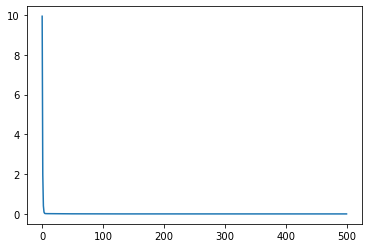

In [25]:
x = np.array([1,2,3])
y = np.array([2.2, 4.4, 6.4])
# y = wx + b
# cost =  (wx + b - y)^2,  
#  cost / dw    =      (wx + b - y)x       오차 * 입력,            오차 * (이전층에서의 출력)     
#  cost / db    =      (wx + b - y)1       오차 * 1


w = 5
b = 1
costs = []
d = (w*x - y)*x
print(d)
for i in range(500) :
    d = np.mean((w*x + b - y)*x)
    db = np.mean((w*x + b - y))
    w = w - 0.1 * d
    b = b - 0.1 * db
    cost = np.mean((w*x + b - y)**2)
    costs.append(cost)
plt.plot(costs)
print(w, b, cost)

4.341088908210722e-05
2.1000000000000028 0.133333333333328 0.0022222222222222066


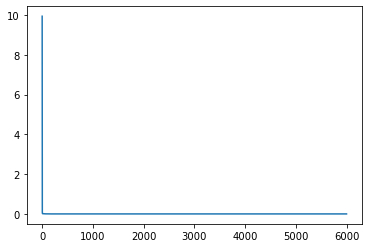

In [26]:
x = np.array([1,2,3])
y = np.array([2.2, 4.4, 6.4])
# y = wx + b
# cost =  (wx + b - y)^2,  
#  cost / dw    =      (wx + b - y)x      ,   오차*입력 ,      오차*(이전층에서의 출력)
#  cost / db    =      (wx + b - y)1          오차*1

w = 5
b = 1
costs = []
print(d)
for i in range(6000) :
    p = w*x + b  # 예측
    err = p - y  # 에러 계산
    d = np.mean(err*x)  # 평균 미분(w)
    db = np.mean(err)   # 평균 미분(b)
    w = w - 0.1 * d     # w 경사하강법
    b = b - 0.1* db     # b 경사하강법

    p = w*x + b
    err = p - y
    cost = np.mean(err**2)
    costs.append(cost)
plt.plot(costs)
print(w, b, cost)

# 주가예측에 대한 경사하강법

0.45309448296686444
176.13419668591186 49.81737013153724 45806.59946237973


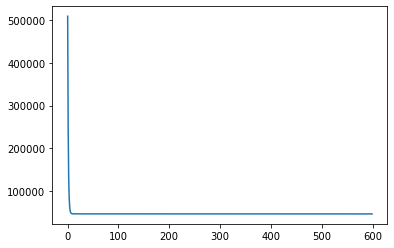

In [32]:
Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

n = Interest_Rate.size
X = np.ones((n, 2))
X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
y = Stock_Index_Price.reshape(-1, 1)

# y = w*실업률 +  b

x = X[:, 0]

w = 5
w2 = 5
b = 1
costs = []
print(d)
for i in range(600) :
    p = w*x + b  # 예측
    err = p - y  # 에러 계산
    d = np.mean(err*x)  # 평균 미분(w)
    db = np.mean(err)   # 평균 미분(b)
    w = w - 0.01 * d     # w 경사하강법
    b = b - 0.01* db     # b 경사하강법

    p = w*x + b
    err = p - y
    cost = np.mean(err**2)
    costs.append(cost)
plt.plot(costs)
print(w, b, cost)

w=208.93993055555558     cost=357705.6513206674
w=316.6762840084877     cost=132194.25038501353
w=373.5667741684264     cost=69199.70267117259
w=403.58403023442577     cost=51602.18394352612
w=419.3981561950098     cost=46685.751794366806
w=427.7056029781253     cost=45311.621268832954
w=432.04560396754687     cost=44926.98831149182
w=434.28872807655756     cost=44818.759378849776
w=435.42361540735203     cost=44787.740803441346
w=435.9727857356112     cost=44778.290352044525
w=436.2124031719586     cost=44774.86506998301
w=436.28842700595885     cost=44773.12322915379
w=436.2780001862859     cost=44771.85202250432
w=436.2218945907501     cost=44770.71266752544
w=436.14165912223126     cost=44769.61052941588
w=436.04868288472545     cost=44768.51917295034
w=435.94898528717766     cost=44767.43121359321
w=435.8457477271441     cost=44766.34458837821
w=435.7406516457471     cost=44765.25872085229
w=435.6345857215035     cost=44764.17344980123
w=435.5280196390623     cost=44763.0887300025

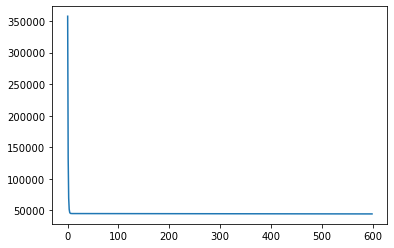

In [35]:
# -250.14657137, 345.54008701, 1798.40397763]

x = X[:, 0] / 3

w = 5
b = 1
costs = []
for i in range(600) :
    p = w*x + b      # 예측
    err = p - y      # 에러계산
    d = np.mean(err*x)  # 미분(w) 평균 
    db = np.mean(err)   # 미분(b) 평균 
    w = w - 0.1 * d     # w 경사하강법
    b = b - 0.1* db     # b 경사하강법

    p = w*x + b
    err = p - y
    cost = np.mean(err**2)
    costs.append(cost)
    print(f"w={w}     cost={cost}")
plt.plot(costs)
print(w, b, cost)

w1 = 471.59584811503294   w2 = 214.6128645928295   b = 617.2824678728763   cost = 42720.03080726472


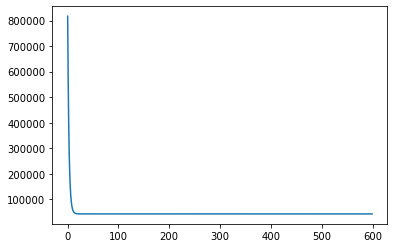

In [51]:
# 주가 = w1 * 실업률 + w2 * 이자율 + b

x1 = X[:, 0] / 7
x2 = X[:, 1] / 7

w1 = 0
w2 = 0
b = 1
costs = []
for i in range(600) :
    p = w1 * x1 + w2 * x2 + b      # 예측
    err = p - y      # 에러계산
    d = np.mean(err * x1)  # 미분(w) 평균 
    dw2 = np.mean(err * x2)   # 미분(w2) 평균 
    db = np.mean(err)   # 미분(b) 평균 

    

    w1 = w1 - 0.1 * d  # w 경사하강법
    w2 = w2 - 0.1 * dw2  
    b = b - 0.1* db     # b 경사하강법

    p = w1 * x1 + w2 * x2 + b   
    err = p - y
    cost = np.mean(err**2)
    costs.append(cost)
#     print(f"w1 = {w1}   w2 = {w2}  cost = {cost}")
plt.plot(costs)
print(f"w1 = {w1}   w2 = {w2}   b = {b}   cost = {cost}")

w=-0.038359062500000006    w2=-0.013768855406746031  b=0.9535041666666667  cost=0.1571301865161484
w=-0.06992972581419121    w2=-0.025107660555744572  b=0.9152302777493962  cost=0.10990804252505447
w=-0.09591264230334343    w2=-0.03444621145891328  b=0.8837241345640371  cost=0.07791284824283665
w=-0.11729610729158806    w2=-0.04213828694860063  b=0.8577887397048503  cost=0.05623461610896521
w=-0.13489361824037843    w2=-0.04847509368753951  b=0.836438806357167  cost=0.04154660263624317
w=-0.14937479090477157    w2=-0.05369633318617227  b=0.8188633134589929  cost=0.03159478536673498
w=-0.16129080740958232    w2=-0.05799931141825503  b=0.8043946836579825  cost=0.024851959915601077
w=-0.17109536337405365    w2=-0.06154643723655731  b=0.7924834127029142  cost=0.020283374732400317
w=-0.17916191015953314    w2=-0.06447139455843454  b=0.7826771860851005  cost=0.017187937820689978
w=-0.1857978475145078    w2=-0.06688422288900361  b=0.7746036892786103  cost=0.015090626951927838
-0.1857978475145

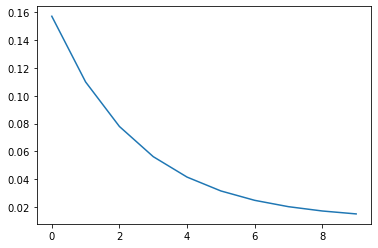

In [54]:
Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

n = Interest_Rate.size
X = np.ones((n, 2))
X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
y = Stock_Index_Price.reshape(-1, 1) / 2000

# y = w*실업률 +  b

x = X / 7
w = 0
w2 = 0
b = 1

costs = []
for i in range(10) :
  p = w*x[:, 0]  + w2*x[:, 1] + b      # 예측
  err = p - y      # 에러계산

  d = np.mean(err*x[:,0])     # 미분(w) 평균    
  dw2 = np.mean(err*x[:,1])   # 미분(w2) 평균 
  db = np.mean(err)           # 미분(b) 평균 

  w = w - 0.1 * d         # w 경사하강법
  w2 = w2 - 0.1 * dw2     # w2 경사하강법
  b = b - 0.1* db         # b 경사하강법

  p = w*x[:, 0]  + w2*x[:, 1] + b   
  err = p - y   
  cost = np.mean(err**2)
  costs.append(cost)
  print(f"w={w}    w2={w2}  b={b}  cost={cost}")
plt.plot(costs)
print(w, w2, b, cost)
print(X)